# Auto MPG Dataset Analysis
## Author: Ranil Rai

## Introduction

This Jupyter Notebook documents the process of loading, cleaning, and analyzing the "Auto MPG" dataset obtained from the UCI Machine Learning Repository. Our objective is to explore the characteristics of various automobiles from the dataset, focusing on their fuel efficiency, as indicated by miles per gallon (mpg), and how it relates to other features such as weight, horsepower, and country of origin.

The analysis will include:
- Data loading and initial inspection
- Data cleaning and transformation
- Exploratory Data Analysis (EDA) through various visualizations

By the end of this notebook, we will have derived insights into the dataset's distribution of variables and the relationships between them.




#### Import Libraries
First, we import the necessary libraries for our analysis. `Pandas` is used for data manipulation and analysis. `NumPy` is for numerical operations. `Matplotlib.pyplot` and `seaborn` are used for data visualization. This step sets up our environment to handle the dataset and perform both the analysis and visualization tasks.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Load the Dataset
Here, we load the "Auto MPG" dataset from the UCI Machine Learning Repository directly into a pandas DataFrame. We specify the column names based on the dataset's attribute information. Additionally, we address missing values in the 'horsepower' column by setting `na_values` to '?', which tells pandas to treat '?' as NaN (missing values). This step is crucial for the initial data setup before performing cleaning and analysis.


In [6]:
# Load the dataset
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',
                 sep='\s+',
                 names=column_names,
                 na_values='?')

#### Preliminary Review of the Data
After loading the data, we display the first few rows using `df.head()`. This quick check allows us to verify that the data has been loaded correctly, the column names are properly assigned, and missing values are appropriately marked. It provides a snapshot of the dataset, offering insight into the types of data and potential cleanup steps we may need to consider.


In [8]:
# Display the first few rows of the dataframe to check
print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model_year  origin                   car_name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


#### Initial Dataset Preview
The output above displays the first few rows of the "Auto MPG" dataset after loading it into a pandas DataFrame. This preview shows us the structure of the dataset, including the names of the columns (`mpg`, `cylinders`, `displacement`, `horsepower`, `weight`, `acceleration`, `model_year`, `origin`, and `car_name`) and a glimpse into the types of values each column contains. Notably, we can see the dataset includes both numerical and categorical data, with the `origin` column currently represented as numerical values. This initial look is crucial for planning the next steps in data cleaning and analysis, such as converting data types where appropriate and handling any missing or anomalous values.


#### Clean the 'horsepower' Column
In this step, we address the issue of missing values in the 'horsepower' column, where they are represented by `'?'`. By using `pd.to_numeric` with `errors='coerce'`, we convert the entire column to a numeric data type, forcing any non-numeric values (`'?'`) to `NaN`. This operation not only cleans the data but also ensures that the 'horsepower' column is treated as numerical for any subsequent analyses, allowing for accurate mathematical operations and aggregations.


In [9]:
# Replace the '?' with NaN in the horsepower column and convert to numeric
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

#### Transform the 'origin' Column
The 'origin' column, which originally contains numerical codes (1, 2, and 3), is transformed to represent geographical regions with categorical labels ('USA', 'Asia', and 'Europe'). This conversion enhances the interpretability of the dataset, making it clearer that these codes refer to the region of manufacture. Such categorical labels are more meaningful and can facilitate more intuitive analyses and visualizations regarding the distribution and impact of car origins.


In [10]:
# Convert origin column to categorical labels
df['origin'] = df['origin'].map({1: 'USA', 2: 'Asia', 3: 'Europe'})

#### Preview the Cleaned DataFrame
After performing the cleaning and transformation operations on the 'horsepower' and 'origin' columns, we display the first few rows of the cleaned DataFrame. This preview allows us to verify that the data cleaning steps have been successfully applied, with the 'horsepower' column now containing numeric values (or `NaN` for previously missing data) and the 'origin' column reflecting the categorical regions. This cleaned DataFrame is now ready for further analysis and visualization tasks.


In [11]:
# Display the first few rows of the clean dataframe
print(df.head())


    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model_year origin                   car_name  
0          70    USA  chevrolet chevelle malibu  
1          70    USA          buick skylark 320  
2          70    USA         plymouth satellite  
3          70    USA              amc rebel sst  
4          70    USA                ford torino  


#### Bar Chart of Cylinder Distribution
The bar chart created with Seaborn illustrates the frequency distribution of different numbers of cylinders in the vehicles from the "Auto MPG" dataset. Each bar represents the count of cars with a particular cylinder count, which is a proxy for engine size and power. The chart is titled 'Distribution of Cylinders' with the x-axis labeled 'Number of Cylinders' and the y-axis labeled 'Frequency'. This visualization helps us quickly grasp which types of engines are most common in this dataset.


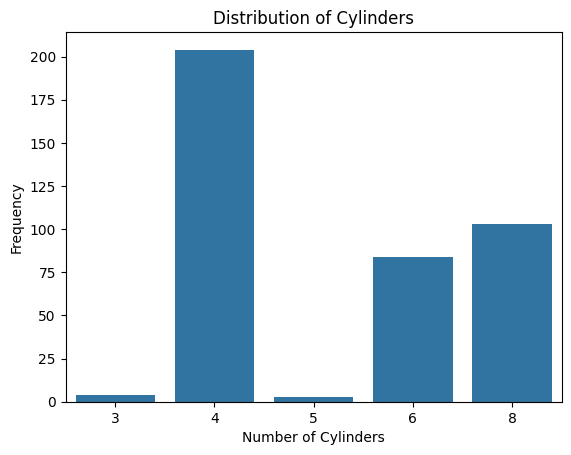

In [2]:
sns.countplot(x='cylinders', data=df)
plt.title('Distribution of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Frequency')
plt.show()


#### Scatterplot of Horsepower vs. Weight
This scatterplot provides a visual examination of the relationship between a vehicle's horsepower and its weight. Each point on the plot represents an individual vehicle from the "Auto MPG" dataset. The x-axis shows the horsepower, which is a measure of engine power, and the y-axis represents the vehicle weight, a measure of size and heft. This visualization can help us infer if there's a trend or pattern that suggests a correlation between the power of a car's engine and its overall weight. By plotting these variables against each other, we aim to uncover insights into how these two attributes may be interrelated.


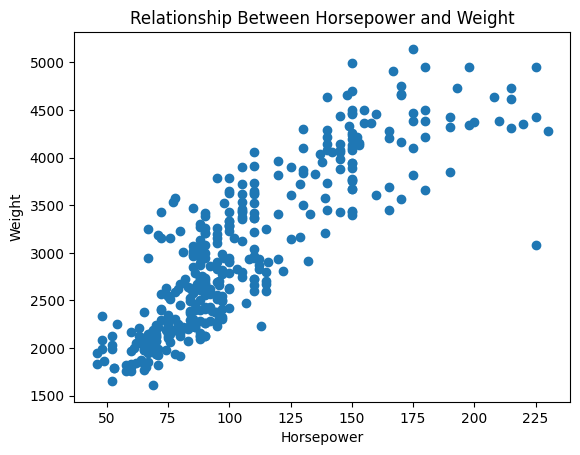

In [3]:
plt.scatter(df['horsepower'], df['weight'])
plt.title('Relationship Between Horsepower and Weight')
plt.xlabel('Horsepower')
plt.ylabel('Weight')
plt.show()


#### Line Plot of Average Fuel Efficiency Over Time
The line plot above represents the trend in average fuel efficiency, measured in miles per gallon (MPG), across different model years in the "Auto MPG" dataset. The x-axis indicates the model year, ranging from the early 70s to the early 80s, and the y-axis shows the average MPG for all cars released that year. This graph provides a clear visual representation of how average fuel efficiency has changed over the years, highlighting any significant improvements or declines. Such trends are vital for understanding advancements in automotive technology, especially in the context of fuel economy standards and environmental impact.


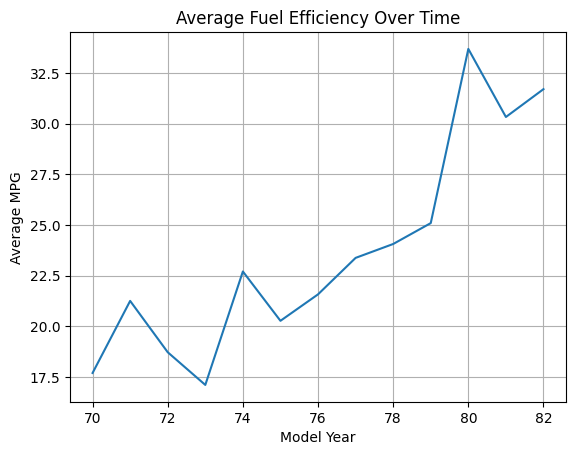

In [4]:
avg_mpg_by_year = df.groupby('model_year')['mpg'].mean()

plt.plot(avg_mpg_by_year.index, avg_mpg_by_year.values)
plt.title('Average Fuel Efficiency Over Time')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.grid(True)
plt.show()


## References

1. Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.
2. Matplotlib: Visualization with Python. (n.d.). Matplotlib. [https://matplotlib.org/](https://matplotlib.org/)
3. Wes McKinney. (2010). Data Structures for Statistical Computing in Python. In Stéfan van der Walt and Jarrod Millman (Eds.), Proceedings of the 9th Python in Science Conference (pp. 56-61).
4. Waskom, M. (2021). seaborn: statistical data visualization. Journal of Open Source Software, 6(60), 3021. [https://doi.org/10.21105/joss.03021](https://doi.org/10.21105/joss.03021)
